<a href="https://colab.research.google.com/github/Codeginner/Sistem-Pendeteksi-Suhu-Tubuh-dan-Hand-Sanitizer-Otomatis-Berbasis-IoT/blob/main/Lecture%2013/CNN/CNN_German_Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gilman Muslih Z

1103201075

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive # Panggil modul drive dari daftar pustaka google collab untuk mengakses google drive
drive.mount('/content/drive') # Lokasi Direktori yang akan diakses

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_file = "/content/drive/MyDrive/Dataset/CNN Germany Traffic Sign/train.p" # Memuat file train
testing_file = "/content/drive/MyDrive/Dataset/CNN Germany Traffic Sign/test.p" # Memuat file test

with open(training_file, mode='rb') as f: # Membuka file train.p dalam mode read binary ('rb') dan penggunaan with akan membuat file secara otomatis ditutup setelah blok dieksekussi
  train = pickle.load(f) # Membaca file train.p

with open(testing_file, mode='rb') as f: # Membuka file test.p dalam mode read binary ('rb') dan penggunaan with akan membuat file secara otomatis ditutup setelah blok dieksekussi
  test = pickle.load(f) # Membaca file test.p

print("Data loaded") # Tampilkan tulisan Data loaded

Data loaded


In [ ]:
file_path = '/content/drive/MyDrive/Dataset/CNN Germany Traffic Sign/signname.csv' # Lokasi file dataset di Google Drive
sign_name_df = pd.read_csv(file_path) # Membaca dataset CSV ke dalam DataFrame dan merubah format data dengan encoding agar data bisa diuraikan
SIGN_NAMES = sign_name_df.SignName.values # Membuat array SIGN_NAMES yang berisi nilai dari kolom 'SignName' di dalam DataFrame
sign_name_df.set_index('ClassId', inplace=True) # Mengatur indeks DataFrame menjadi kolom 'ClassId'
sign_name_df.head(10) # Membaca 10 baris pertama dari dataset

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [ ]:
X, y = train['features'], train['labels'] # Mengassign nilai dari kolom 'features' ke variabel X_train dan nilai dari kolom 'labels' ke variabel y_train


In [ ]:
data = np.array(X) # Mengonversi data gambar dari DataFrame (X) menjadi numpy array
labels = np.array(y) # Mengonversi label dari DataFrame (y) menjadi numpy array
print(data.shape, labels.shape) # Tampilkan data

(34799, 32, 32, 3) (34799,)


In [ ]:
X_test, y_test = test['features'], test['labels'] # Mengassign nilai dari kolom 'features' ke variabel X_test dan nilai dari kolom 'labels' ke variabel y_test

In [ ]:
X_test = np.array(X_test) # Mengonversi data gambar dari DataFrame (X_test) menjadi numpy array
y_test = np.array(y_test) # Mengonversi label dari DataFrame (y_test) menjadi numpy array
print(X_test.shape, y_test.shape) # Tampilkan data

(12630, 32, 32, 3) (12630,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0) # Membagi dataset menjadi data latih dan data uji
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape) # Tampilkan data

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


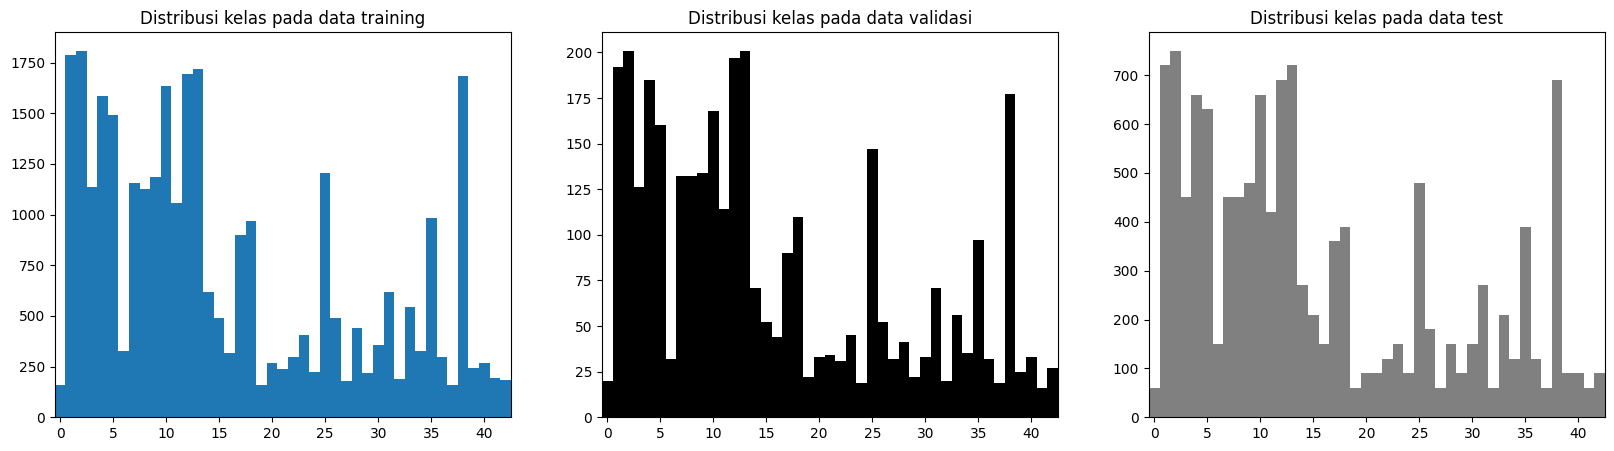

In [ ]:
n_labels = np.unique(y_train).size # Anda menghitung jumlah label unik dalam array y_train menggunakan fungsi np.unique dari NumPy

def hist_data(y_data, title=None, ax=None, **kwargs): # Untuk membuat histogram dari data y_data pada subplot yang mungkin sudah ada (ax). Beberapa argumen opsional juga diterima, seperti title untuk judul subplot dan **kwargs yang dapat digunakan untuk meneruskan argumen tambahan ke fungsi plt.hist()
    if not ax: # Jika tidak ada ax yang didefinisikan
        fig = plt.figure() # Buat plot figure
        ax = fig.add_subplot(111) # Subplot baru akan ditambahkan dan menunjukkan bahwa ini adalah subplot tunggal dalam grid 1x1
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs) # Untuk membuat histogram. Argumen y_data adalah data yang digunakan untuk membuat histogram
    ax.set_xlim(-0.5, n_labels-0.5) # Untuk menetapkan batas sumbu x pada subplot
    if 'label' in kwargs: # jika kolom label terdapat dalam kwargs
        ax.legend() # Tampilkan panduan figure
    if title: # Jika judul sudah didefisikan
        ax.set_title(title) # Untuk mengatur judul subplot dengan nilai yang ada di dalam variabel title

fig, ax = plt.subplots(1, 3, figsize=(20, 5)) # Membuat figure dengan ukuran lebar 20 inci dan tinggi 5 inci dengan subplot 1 baris dan 3 kolom
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0]) # Menampilkan histogram data y_train dengan judul tersebut dan mengisi figure o dan di subplot baris ke-1 kolom ke-1
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black') # Menampilkan histogram data y_val dengan judul tersebut dan mengisi figure 1 dan di subplot baris ke-1 kolom ke-2 dengan warna hitam
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey') # Menampilkan histogram data y_test dengan judul tersebut dan mengisi figure 2 dan di subplot baris ke-1 kolom ke-3 dengan warna abu-abu

In [ ]:
from tensorflow.keras.utils import to_categorical # Panggil modul to_categorical dari daftar pustaka tensorflow.keras.utils untuk mengonversi label kelas menjadi representasi one-hot encoding

y_train = to_categorical(y_train, 43) # Mengonversi label pelatihan (y_train) menjadi representasi one-hot encoding
y_val= to_categorical(y_val, 43) # Mengonversi label pelatihan (y_val) menjadi representasi one-hot encoding

In [ ]:
import tensorflow as tf # Panggil modul tensorflow untuk pengembangan dan pelatihan model

class myCallback(tf.keras.callbacks.Callback): # Membuat kelas myCallback
    def on_epoch_end(self, epoch, logs={}): # Adalah salah satu metode yang dapat Anda override (timpa) ketika Anda membuat kelas turunan dari tf.keras.callbacks.Callback
         if(logs.get('accuracy') > 0.96): # Untuk menghentikan pelatihan jika akurasi pada akhir epoch melebihi 96%
              print("\nAkurasi telah mencapai >96%. Stop training!") # Tampilkan tulisan
              self.model.stop_training = True # Fungsi untuk menghentikan pelatihan
callbacks = myCallback() # Mengindikasikan bahwa instance callback yang telah Anda buat (myCallback()) akan digunakan selama proses pelatihan model

In [ ]:
model = Sequential() # Digunakan untuk membuat objek model sequential menggunakan Keras
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) # menambahkan lapisan konvolusi (Convolutional Layer) ke dalam model
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) # Menambahkan lapisan konvolusi (Convolutional Layer) ke dalam model
model.add(MaxPool2D(pool_size=(2, 2))) # Untuk mereduksi dimensi spasial dari representasi gambar dan mengurangi jumlah parameter yang akan diproses
model.add(Dropout(rate=0.25)) # Untuk mengurangi overfitting

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Menambahkan lapisan konvolusi (Convolutional Layer) ke dalam model
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Menambahkan lapisan konvolusi (Convolutional Layer) ke dalam model
model.add(MaxPool2D(pool_size=(2, 2))) # Untuk mereduksi dimensi spasial dari representasi gambar dan mengurangi jumlah parameter yang akan diproses
model.add(Dropout(rate=0.25)) # Untuk mengurangi overfitting

model.add(Flatten()) # Mengubah vektor menjadi satu dimensi
model.add(Dense(256, activation='relu')) # Untuk menghubungkan setiap neuron dengan setiap neuron di lapisan sebelumnya dan sesudahnya, menciptakan hubungan penuh atau fully connected antara lapisan tersebut
model.add(Dropout(0.5)) # Untuk mengurangi overfitting
model.add(Dense(43, activation='softmax')) # Untuk menghubungkan setiap neuron dengan setiap neuron di lapisan sebelumnya dan sesudahnya, menciptakan hubungan penuh atau fully connected antara lapisan tersebut

In [ ]:
model.summary() # Ringkasan isi model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Menentukan fungsi loss, optimizer, dan metriks evaluasi yang akan dihitung selama pelatihan

In [ ]:
epochs = 25 #  Menentukan jumlah epoch atau iterasi pelatihan
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks]) # Memprediksi model dari data pelatihan dan label pelatihan, model akan diperbarui setiap kali 32 sampel telah diproses, melakukan 25 kali iterasi pelatihan, data validasi yang digunakan untuk mengukur performa model pada setiap epoch, dan Callbacks dapat digunakan untuk memonitor proses pelatihan dan menghentikannya lebih awal jika diperlukan

Epoch 1/25
979/979 [==============================] - 14s 8ms/step - loss: 1.9632 - accuracy: 0.5036 - val_loss: 0.4830 - val_accuracy: 0.8779
Epoch 2/25
979/979 [==============================] - 6s 6ms/step - loss: 0.7431 - accuracy: 0.7803 - val_loss: 0.2820 - val_accuracy: 0.9224
Epoch 3/25
979/979 [==============================] - 6s 6ms/step - loss: 0.5600 - accuracy: 0.8334 - val_loss: 0.2378 - val_accuracy: 0.9448
Epoch 4/25
979/979 [==============================] - 5s 5ms/step - loss: 0.4540 - accuracy: 0.8619 - val_loss: 0.1711 - val_accuracy: 0.9509
Epoch 5/25
979/979 [==============================] - 5s 5ms/step - loss: 0.3525 - accuracy: 0.8947 - val_loss: 0.1294 - val_accuracy: 0.9606
Epoch 6/25
979/979 [==============================] - 6s 6ms/step - loss: 0.3108 - accuracy: 0.9057 - val_loss: 0.1306 - val_accuracy: 0.9664
Epoch 7/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2781 - accuracy: 0.9165 - val_loss: 0.1125 - val_accuracy: 0.9690
Epoch

In [ ]:
model.save("my_model.h5") # Digunakan untuk menyimpan model ke dalam file dengan format HDF5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


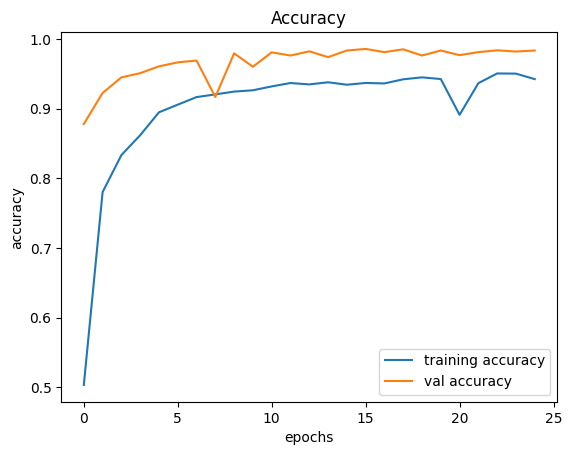

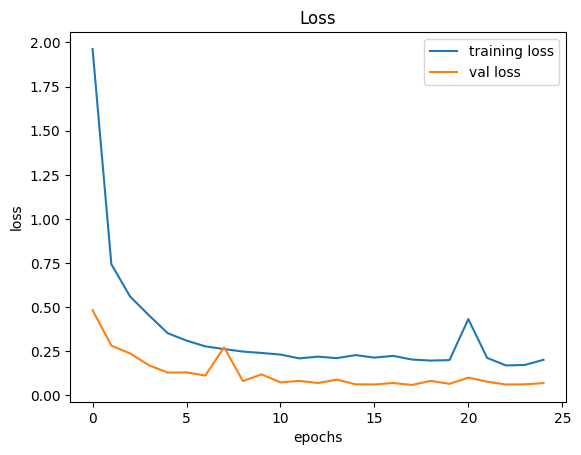

In [ ]:
# Plotting graphs for accuracy
plt.figure(0) # Membuat suatu gambar atau objek gambar dengan nomor gambar (figure number) 0
plt.plot(history.history['accuracy'], label='training accuracy') # Menambahkan plot garis untuk 'accuracy' pada set pelatihan
plt.plot(history.history['val_accuracy'], label='val accuracy') # Menambahkan plot garis untuk 'val_accuracy' pada set pelatihan
plt.title('Accuracy') # Menulis judul dengan nama Accuracy
plt.xlabel('epochs') # Menulis label 'x' (yang di bawah) dengan nama epochs
plt.ylabel('accuracy') # Menulis label 'y' (yang di kiri) dengan nama accuracy
plt.legend() # Tampilkan panduan plot
plt.show() # Tampilkan figure

# Plotting graphs for loss
plt.figure(1) # Membuat suatu gambar atau objek gambar dengan nomor gambar (figure number) 1
plt.plot(history.history['loss'], label='training loss') # Menambahkan plot garis untuk loss pada set pelatihan
plt.plot(history.history['val_loss'], label='val loss') # Menambahkan plot garis untuk val_loss pada set pelatihan
plt.title('Loss') # Menulis judul dengan nama Loss
plt.xlabel('epochs') # Menulis label 'x' (yang di bawah) dengan nama epochs
plt.ylabel('loss') # Menulis label 'y' (yang di kiri) dengan nama loss
plt.legend() # Tampilkan panduan plot
plt.show() # Tampilkan figure

In [ ]:
from sklearn.metrics import accuracy_score # Panggil modul accuracy_score dari daftar pustaka sklearn.metrics untuk menghitung prediksi akurasi yang dilakukan oleh model

pred = np.argmax(model.predict(X_test), axis=-1) # Untuk melakukan prediksi dengan model
accuracy_score(y_test, pred) # Tampilkan skor akurasi

395/395 [==============================] - 1s 3ms/step


0.9297703879651623

In [ ]:
from sklearn.metrics import classification_report # Panggil modul classification_report  dari daftar pustaka sklearn.metrics untuk menghasilkan laporan klasifikasi yang menyediakan sejumlah metrik evaluasi untuk setiap kelas dan metrik secara keseluruhan

print(classification_report(y_test, pred)) # Tampilkan laporan klasifikasi model

              precision    recall  f1-score   support

           0       0.95      0.70      0.81        60
           1       0.97      0.93      0.95       720
           2       0.93      0.97      0.95       750
           3       0.98      0.87      0.92       450
           4       0.90      0.97      0.93       660
           5       0.85      0.91      0.88       630
           6       0.98      0.83      0.90       150
           7       0.93      0.94      0.94       450
           8       0.94      0.92      0.93       450
           9       0.99      0.98      0.99       480
          10       0.99      0.98      0.98       660
          11       0.85      0.98      0.91       420
          12       0.99      0.96      0.97       690
          13       0.99      0.99      0.99       720
          14       0.99      0.98      0.99       270
          15       0.92      1.00      0.95       210
          16       0.99      0.99      0.99       150
          17       0.98    